In [1]:
from brian2 import *

In [2]:
morpho = Cylinder(length=10*cm, diameter=2*238*um, n=1000, type='axon')

In [3]:
el = 10.613*mV
ena = 115*mV
ek = -12*mV
gl = 0.3*msiemens/cm**2
gNa0 = 120*msiemens/cm**2
gk = 36*msiemens/cm**2

In [4]:
# Typical equations
eqs = '''
# The same equations for the whole neuron, but possibly different parameter values
# distributed transmembrane current
Im = gl * (el-v) + gNa * m**3 * h * (ena-v) + gk * n**4 * (ek-v) : amp/meter**2
I : amp (point current) # applied current
dm/dt = alpham * (1-m) - betam * m : 1
dn/dt = alphan * (1-n) - betan * n : 1
dh/dt = alphah * (1-h) - betah * h : 1
alpham = (0.1/mV) * 10*mV/exprel((-v+25*mV)/(10*mV))/ms : Hz
betam = 4 * exp(-v/(18*mV))/ms : Hz
alphah = 0.07 * exp(-v/(20*mV))/ms : Hz
betah = 1/(exp((-v+30*mV) / (10*mV)) + 1)/ms : Hz
alphan = (0.01/mV) * 10*mV/exprel((-v+10*mV)/(10*mV))/ms : Hz
betan = 0.125*exp(-v/(80*mV))/ms : Hz
gNa : siemens/meter**2
'''

In [5]:
neuron = SpatialNeuron(morphology=morpho, model=eqs, Cm=1*uF/cm**2,
                       Ri=35.4*ohm*cm, method="exponential_euler")

In [6]:
neuron.v = 0*mV
neuron.h = 1
neuron.m = 0
neuron.n = .5
neuron.I = 0
neuron.gNa = gNa0
neuron[5*cm:10*cm].gNa = 0*siemens/cm**2

In [7]:
M = StateMonitor(neuron, 'v', record=True)

In [8]:
run(50*ms, report='text')
neuron.I[0] = 1*uA  # current injection at one end
run(3*ms)
neuron.I = 0*amp
run(100*ms, report='text')

WARNING    The expression "1 / 20" divides two integer values. In previous versions of Brian, this would have used either an integer ("flooring") or a floating point division, depending on the Python version and the code generation target. In the current version, it always uses a floating point division. Explicitly ask for an  integer division ("//"), or turn one of the operands into a floating point value (e.g. replace "1/2" by "1.0/2") to no longer receive this warning. [brian2.parsing.bast.floating_point_division]
WARNING    The expression "5 / 2" divides two integer values. In previous versions of Brian, this would have used either an integer ("flooring") or a floating point division, depending on the Python version and the code generation target. In the current version, it always uses a floating point division. Explicitly ask for an  integer division ("//"), or turn one of the operands into a floating point value (e.g. replace "1/2" by "1.0/2") to no longer receive this warning. [

Starting simulation at t=0. s for a duration of 50. ms
50. ms (100%) simulated in < 1s
Starting simulation at t=53. ms for a duration of 100. ms
100. ms (100%) simulated in < 1s


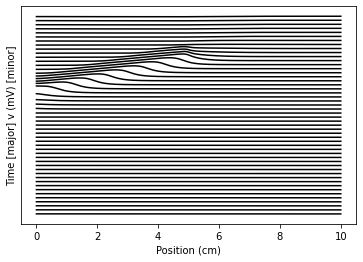

In [9]:
for i in range(75, 125, 1):
    plot(cumsum(neuron.length)/cm, i+(1./60)*M.v[:, i*5]/mV, 'k')
yticks([])
ylabel('Time [major] v (mV) [minor]')
xlabel('Position (cm)')
axis('tight')
show()

In [10]:
neuron.equations

alphan = 0.1/(ms*exprel((10*mV - v)/(10*mV))) : hertz
gtot__private = gNa*h*m**3 + gk*n**4 + gl : siemens / meter ** 2
I0__private = I/area + ek*gk*n**4 + el*gl + ena*gNa*h*m**3 : amp / meter ** 2
time_constant = Cm/gtot__private : second
alpham = 1.0/(ms*exprel((25*mV - v)/(10*mV))) : hertz
betah = 1/(ms*(exp((30*mV - v)/(10*mV)) + 1)) : hertz
betam = 4*exp(-v/(18*mV))/ms : hertz
alphah = 0.07*exp(-v/(20*mV))/ms : hertz
betan = 0.125*exp(-v/(80*mV))/ms : hertz
Im = I/area + gNa*h*m**3*(ena - v) + gk*n**4*(ek - v) + gl*(el - v) : amp / meter ** 2
space_constant = 0.629960524947437*pi**(-0.333333333333333)*(Ri*gtot__private)**(-0.5)*(area/(1/r_length_2 + 1/r_length_1))**0.166666666666667 : metre
dh/dt = alphah*(1 - h) - betah*h : radian
dm/dt = alpham*(1 - m) - betam*m : radian
dn/dt = alphan*(1 - n) - betan*n : radian
Cm : farad / meter ** 2 (constant)
I : amp
Ic : amp / meter ** 2
Ri : ohm * meter (constant, shared)
area : metre2 (constant)
diameter : metre (constant)
distance : metre

In [12]:
neuron.gL

AttributeError: No attribute with name gL